In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/andrenedvidek/Desktop/Data Analaysis/CareerFoundry /Data Emersion /Task 4.3/02 Data copy/Prepared Data'

## Task 1

In [3]:
prepared_data_total = pd.read_pickle(os.path.join(path,'ords_prods_merge_prepeard_2.pkl'))

## Task 2

In [4]:
# understanding which columns are affected be PII concerns
prepared_data_total.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,income,price_range_loc,busiest_days,order_hour_of_day_loc,max_order,loyalty_flag,spend_ave,spender_typ,frequency_ave,customer_freq
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,...,49620.0,Mid-range product,Regularly busy,busiest period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,...,49620.0,Mid-range product,Regularly busy,medium busy period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851.0,709.0,prior,2.0,0.0,...,158302.0,Mid-range product,Busiest days,medium busy period of day,5.0,New customer,7.930208,low_spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770.0,764.0,prior,1.0,3.0,...,31308.0,Mid-range product,Least busy days,busiest period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452.0,764.0,prior,3.0,4.0,...,31308.0,Mid-range product,Least busy days,medium busy period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer


In [5]:
print(prepared_data_total.columns)

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'indicator_column_name', 'Last Name', 'Gender',
       'state', 'Age', 'date_joined', 'nr_dependants', 'family status',
       'income', 'price_range_loc', 'busiest_days', 'order_hour_of_day_loc',
       'max_order', 'loyalty_flag', 'spend_ave', 'spender_typ',
       'frequency_ave', 'customer_freq'],
      dtype='object')


In [6]:
prepared_data_total.shape

(32404870, 33)

In [7]:
# since last name is a potential PII concerns I will drop the column 
prepared_data_total.drop(columns=['Last Name'], inplace=True)

In [8]:
prepared_data_total.shape

(32404870, 32)

In [9]:
# checking if the drop was successful
prepared_data_total.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,income,price_range_loc,busiest_days,order_hour_of_day_loc,max_order,loyalty_flag,spend_ave,spender_typ,frequency_ave,customer_freq
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,...,49620.0,Mid-range product,Regularly busy,busiest period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,...,49620.0,Mid-range product,Regularly busy,medium busy period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851.0,709.0,prior,2.0,0.0,...,158302.0,Mid-range product,Busiest days,medium busy period of day,5.0,New customer,7.930208,low_spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770.0,764.0,prior,1.0,3.0,...,31308.0,Mid-range product,Least busy days,busiest period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452.0,764.0,prior,3.0,4.0,...,31308.0,Mid-range product,Least busy days,medium busy period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer


## Task 3

In [10]:
pd.set_option('display.max_columns', None)  

In [11]:
# now I want to sort the customer base into diffrent rigions 
result = []

for value in prepared_data_total["state"]:
    if value in ('Maine', 'New Hampshire', 'Vermont', 
                 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York',
                 'Pennsylvania', 'New Jersey'):
        result.append("Northeast")
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 
                   'Indiana', 'Ohio', 'North Dakota', 'South Dakota',
                   'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append("Midwest")
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 
                   'Virginia', 'West Virginia', 'North Carolina', 'South Carolina',
                   'Georgia', 'Florida', 'Kentucky', 'Tennessee', 
                   'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 
                   'Louisiana'):
        result.append("South")
    elif value in ('Idaho', 'Montana', 'Wyoming', 
                   'Nevada', 'Utah', 'Colorado', 'Arizona',
                   'New Mexico', 'Alaska', 'Washington', 'Oregon', 
                   'California', 'Hawaii'):
        result.append("West")
    else:
        result.append("Unknown")


In [12]:
prepared_data_total['Region']=result

In [13]:
prepared_data_total.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,indicator_column_name,Gender,state,Age,date_joined,nr_dependants,family status,income,price_range_loc,busiest_days,order_hour_of_day_loc,max_order,loyalty_flag,spend_ave,spender_typ,frequency_ave,customer_freq,Region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,11.0,3.0,5.0,0.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,busiest period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,17.0,20.0,1.0,1.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,medium busy period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851.0,709.0,prior,2.0,0.0,21.0,6.0,20.0,0.0,both,both,Female,Vermont,66.0,6/16/2018,2.0,married,158302.0,Mid-range product,Busiest days,medium busy period of day,5.0,New customer,7.930208,low_spender,8.0,Frequent customer,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770.0,764.0,prior,1.0,3.0,13.0,NaN,10.0,0.0,both,both,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mid-range product,Least busy days,busiest period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452.0,764.0,prior,3.0,4.0,17.0,9.0,11.0,1.0,both,both,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mid-range product,Least busy days,medium busy period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer,Midwest


In [14]:
# crossing the Region Table with the spending flag 
crosstab = pd.crosstab(prepared_data_total['Region']
                       , prepared_data_total['spender_typ'], dropna = False)

In [15]:
crosstab.to_clipboard()

## Task 4

In [16]:
prepared_data_total_drop = prepared_data_total

In [17]:
# i am creating a flag in a new column and fill filter for low activity customers. I will then drop these customers and delet the column 
prepared_data_total_drop.loc[prepared_data_total['max_order'] < 5, 'low_activity_flag'] = 'need_to_be_dropped'

In [18]:
prepared_data_total_drop.loc[prepared_data_total['max_order'] > 4, 'low_activity_flag'] = 'dont_need_to_be_droped'

In [19]:
prepared_data_total_drop.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,indicator_column_name,Gender,state,Age,date_joined,nr_dependants,family status,income,price_range_loc,busiest_days,order_hour_of_day_loc,max_order,loyalty_flag,spend_ave,spender_typ,frequency_ave,customer_freq,Region,low_activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,11.0,3.0,5.0,0.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,busiest period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,dont_need_to_be_droped
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,17.0,20.0,1.0,1.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,medium busy period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,dont_need_to_be_droped
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851.0,709.0,prior,2.0,0.0,21.0,6.0,20.0,0.0,both,both,Female,Vermont,66.0,6/16/2018,2.0,married,158302.0,Mid-range product,Busiest days,medium busy period of day,5.0,New customer,7.930208,low_spender,8.0,Frequent customer,Northeast,dont_need_to_be_droped
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770.0,764.0,prior,1.0,3.0,13.0,NaN,10.0,0.0,both,both,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mid-range product,Least busy days,busiest period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer,Midwest,need_to_be_dropped
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452.0,764.0,prior,3.0,4.0,17.0,9.0,11.0,1.0,both,both,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mid-range product,Least busy days,medium busy period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer,Midwest,need_to_be_dropped


In [20]:
# Drop rows where the low_activity_flag is 'need_to_be_dropped'
prepared_data_total_drop = prepared_data_total[prepared_data_total['low_activity_flag'] != 'need_to_be_dropped']


In [21]:
prepared_data_total_drop.shape

(30964575, 34)

In [22]:
prepared_data_total.drop(columns=['low_activity_flag'], inplace=True)

In [23]:
prepared_data_total_drop.shape

(30964575, 34)

In [24]:
prepared_data_total_drop.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,indicator_column_name,Gender,state,Age,date_joined,nr_dependants,family status,income,price_range_loc,busiest_days,order_hour_of_day_loc,max_order,loyalty_flag,spend_ave,spender_typ,frequency_ave,customer_freq,Region,low_activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,11.0,3.0,5.0,0.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,busiest period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,dont_need_to_be_droped
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,17.0,20.0,1.0,1.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,medium busy period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,dont_need_to_be_droped
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851.0,709.0,prior,2.0,0.0,21.0,6.0,20.0,0.0,both,both,Female,Vermont,66.0,6/16/2018,2.0,married,158302.0,Mid-range product,Busiest days,medium busy period of day,5.0,New customer,7.930208,low_spender,8.0,Frequent customer,Northeast,dont_need_to_be_droped
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441.0,777.0,prior,16.0,1.0,7.0,26.0,7.0,0.0,both,both,Female,Hawaii,51.0,1/4/2019,2.0,married,57797.0,Mid-range product,Busiest days,medium busy period of day,26.0,Regular customer,6.935398,low_spender,11.0,Regular customer,West,dont_need_to_be_droped
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483.0,825.0,prior,3.0,2.0,14.0,30.0,2.0,0.0,both,both,Male,District of Columbia,20.0,5/8/2019,3.0,living with parents and siblings,34171.0,Mid-range product,Regularly busy,busiest period of day,9.0,New customer,5.957576,low_spender,20.0,Regular customer,South,dont_need_to_be_droped


In [25]:
prepared_data_total_drop.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,indicator_column_name,Gender,state,Age,date_joined,nr_dependants,family status,income,price_range_loc,busiest_days,order_hour_of_day_loc,max_order,loyalty_flag,spend_ave,spender_typ,frequency_ave,customer_freq,Region,low_activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,11.0,3.0,5.0,0.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,busiest period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,dont_need_to_be_droped
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,17.0,20.0,1.0,1.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,medium busy period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,dont_need_to_be_droped
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851.0,709.0,prior,2.0,0.0,21.0,6.0,20.0,0.0,both,both,Female,Vermont,66.0,6/16/2018,2.0,married,158302.0,Mid-range product,Busiest days,medium busy period of day,5.0,New customer,7.930208,low_spender,8.0,Frequent customer,Northeast,dont_need_to_be_droped
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441.0,777.0,prior,16.0,1.0,7.0,26.0,7.0,0.0,both,both,Female,Hawaii,51.0,1/4/2019,2.0,married,57797.0,Mid-range product,Busiest days,medium busy period of day,26.0,Regular customer,6.935398,low_spender,11.0,Regular customer,West,dont_need_to_be_droped
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483.0,825.0,prior,3.0,2.0,14.0,30.0,2.0,0.0,both,both,Male,District of Columbia,20.0,5/8/2019,3.0,living with parents and siblings,34171.0,Mid-range product,Regularly busy,busiest period of day,9.0,New customer,5.957576,low_spender,20.0,Regular customer,South,dont_need_to_be_droped


In [26]:
prepared_data_total_drop.to_pickle(os.path.join(path,'ords_prods_merge_prepeard_dropped.pkl'))

## Task 5

In [27]:

prepared_data_total['Age'].unique()


array([81., 66., 40., 51., 20., 65., 72., 61., 19., 78., 76., 41., 67.,
       37., 22., 30., 54., 73., 28., 80., 25., 36., 50., 77., 60., 35.,
       71., 32., 49., 21., 38., 53., 42., 29., 58., 26., 52., 64., 56.,
       43., 45., 27., 47., 55., 57., 63., 24., 46., 39., 18., 44., 31.,
       33., 75., 69., 34., 59., 70., 68., 62., 74., 48., 23., 79., nan])

In [28]:
# create an age flag 
result_2 = []

for value in prepared_data_total["Age"]:
    if value <= 30:
        result_2.append("Young Adult")
    elif 30 < value <= 65:
        result_2.append("Middle Age Adult")
    elif value > 65:
        result_2.append("Senior")
    else:
        result_2.append("N/A")

        
        

In [29]:
prepared_data_total['Age_Flag']=result_2

In [30]:
prepared_data_total.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,indicator_column_name,Gender,state,Age,date_joined,nr_dependants,family status,income,price_range_loc,busiest_days,order_hour_of_day_loc,max_order,loyalty_flag,spend_ave,spender_typ,frequency_ave,customer_freq,Region,Age_Flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,11.0,3.0,5.0,0.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,busiest period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,17.0,20.0,1.0,1.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,medium busy period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,Senior
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851.0,709.0,prior,2.0,0.0,21.0,6.0,20.0,0.0,both,both,Female,Vermont,66.0,6/16/2018,2.0,married,158302.0,Mid-range product,Busiest days,medium busy period of day,5.0,New customer,7.930208,low_spender,8.0,Frequent customer,Northeast,Senior
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770.0,764.0,prior,1.0,3.0,13.0,NaN,10.0,0.0,both,both,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mid-range product,Least busy days,busiest period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer,Midwest,Middle Age Adult
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452.0,764.0,prior,3.0,4.0,17.0,9.0,11.0,1.0,both,both,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mid-range product,Least busy days,medium busy period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer,Midwest,Middle Age Adult


In [31]:
#Create an income_flag
prepared_data_total.loc[prepared_data_total['income'] < 35000, 'income_flag'] = 'Low Income'


In [32]:
prepared_data_total.loc[(prepared_data_total['income'] >= 35000) & (prepared_data_total['income'] < 75000), 'income_flag'] = 'Medium Income'

In [33]:
prepared_data_total.loc[(prepared_data_total['income'] >= 75000) & (prepared_data_total['income'] < 150000), 'income_flag'] = 'High Income'

In [34]:
prepared_data_total.loc[prepared_data_total['income'] >= 150000, 'income_flag'] = 'Top Income'


In [35]:
prepared_data_total.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,indicator_column_name,Gender,state,Age,date_joined,nr_dependants,family status,income,price_range_loc,busiest_days,order_hour_of_day_loc,max_order,loyalty_flag,spend_ave,spender_typ,frequency_ave,customer_freq,Region,Age_Flag,income_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,11.0,3.0,5.0,0.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,busiest period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,Senior,Medium Income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,17.0,20.0,1.0,1.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,medium busy period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,Senior,Medium Income
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851.0,709.0,prior,2.0,0.0,21.0,6.0,20.0,0.0,both,both,Female,Vermont,66.0,6/16/2018,2.0,married,158302.0,Mid-range product,Busiest days,medium busy period of day,5.0,New customer,7.930208,low_spender,8.0,Frequent customer,Northeast,Senior,Top Income
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770.0,764.0,prior,1.0,3.0,13.0,NaN,10.0,0.0,both,both,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mid-range product,Least busy days,busiest period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer,Midwest,Middle Age Adult,Low Income
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452.0,764.0,prior,3.0,4.0,17.0,9.0,11.0,1.0,both,both,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mid-range product,Least busy days,medium busy period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer,Midwest,Middle Age Adult,Low Income


In [36]:
# Create a flag for department ID for that we first need to import csv department 


In [37]:
path_2 = r'/Users/andrenedvidek/Desktop/Data Analaysis/CareerFoundry /Data Emersion /Task 4.3/02 Data copy/Original Data'

In [38]:
depart = pd.read_csv(os.path.join(path_2,'departments.csv'))

In [39]:
depart.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [40]:
 prepared_data_total['department_id'].unique()

array([19, 13,  7,  1, 11, 16, 17, 18, 12,  9,  8, 14, 15,  4, 21,  6, 20,
        5,  3,  2, 10])

In [41]:
# just changing the way the data is presentes but not acctually changing anything
depart.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [42]:
depart_t = depart.T

In [43]:

depart_t.reset_index(inplace=True)

In [44]:

depart_t.columns = depart_t.iloc[0]



In [45]:
#removing the first row in the dataframe
depart_t = depart_t.drop(0)

In [46]:
depart_t


,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [47]:
#check if the dataframes have the same datatype
depart_t['department_id'] = depart_t['department_id'].astype(int)

In [48]:
prepared_data_total.dtypes



product_id                   int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
order_id                   float64
user_id                    float64
eval_set                    object
order_number               float64
orders_day_of_week         float64
order_hour_of_day          float64
days_since_prior_order     float64
add_to_cart_order          float64
reordered                  float64
_merge                    category
indicator_column_name     category
Gender                      object
state                       object
Age                        float64
date_joined                 object
nr_dependants              float64
family status               object
income                     float64
price_range_loc             object
busiest_days                object
order_hour_of_day_loc       object
max_order                  float64
loyalty_flag                object
spend_ave           

In [49]:
# merging the 2 tables
merged_data = pd.merge(prepared_data_total, depart_t, on='department_id', how='inner')

In [50]:
merged_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,indicator_column_name,Gender,state,Age,date_joined,nr_dependants,family status,income,price_range_loc,busiest_days,order_hour_of_day_loc,max_order,loyalty_flag,spend_ave,spender_typ,frequency_ave,customer_freq,Region,Age_Flag,income_flag,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,11.0,3.0,5.0,0.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,busiest period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,Senior,Medium Income,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,17.0,20.0,1.0,1.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,medium busy period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,Senior,Medium Income,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851.0,709.0,prior,2.0,0.0,21.0,6.0,20.0,0.0,both,both,Female,Vermont,66.0,6/16/2018,2.0,married,158302.0,Mid-range product,Busiest days,medium busy period of day,5.0,New customer,7.930208,low_spender,8.0,Frequent customer,Northeast,Senior,Top Income,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770.0,764.0,prior,1.0,3.0,13.0,NaN,10.0,0.0,both,both,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mid-range product,Least busy days,busiest period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer,Midwest,Middle Age Adult,Low Income,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452.0,764.0,prior,3.0,4.0,17.0,9.0,11.0,1.0,both,both,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mid-range product,Least busy days,medium busy period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer,Midwest,Middle Age Adult,Low Income,snacks


## Task 6

In [51]:
## This code sumuraizes many diffrent atrubutes into one flag 
def create_profile(row):
    profile = ''
    # Age categories
    if row['Age'] < 30:
        profile += 'Young '
    elif 30 <= row['Age'] <= 50:
        profile += 'Adult '
    else:
        profile += 'Senior '
    
    # Income categories
    if row['income'] < 75000:
        profile += 'Low-Medium Income '
    else:
        profile += 'High Income '
    
    # Number of dependants categories
    if row['nr_dependants'] == 0:
        profile += 'Single'
    else:
        profile += 'With Dependents'
    
    return profile



In [52]:
merged_data['customer_profile'] = merged_data.apply(create_profile, axis=1)

In [53]:
merged_data

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,indicator_column_name,Gender,state,Age,date_joined,nr_dependants,family status,income,price_range_loc,busiest_days,order_hour_of_day_loc,max_order,loyalty_flag,spend_ave,spender_typ,frequency_ave,customer_freq,Region,Age_Flag,income_flag,department,customer_profile
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138.0,prior,28.0,6.0,11.0,3.0,5.0,0.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,busiest period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,Senior,Medium Income,snacks,Senior Low-Medium Income With Dependents
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138.0,prior,30.0,6.0,17.0,20.0,1.0,1.0,both,both,Male,Minnesota,81.0,8/1/2019,1.0,married,49620.0,Mid-range product,Regularly busy,medium busy period of day,32.0,Regular customer,6.935811,low_spender,8.0,Frequent customer,Midwest,Senior,Medium Income,snacks,Senior Low-Medium Income With Dependents
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851.0,709.0,prior,2.0,0.0,21.0,6.0,20.0,0.0,both,both,Female,Vermont,66.0,6/16/2018,2.0,married,158302.0,Mid-range product,Busiest days,medium busy period of day,5.0,New customer,7.930208,low_spender,8.0,Frequent customer,Northeast,Senior,Top Income,snacks,Senior High Income With Dependents
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770.0,764.0,prior,1.0,3.0,13.0,NaN,10.0,0.0,both,both,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mid-range product,Least busy days,busiest period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer,Midwest,Middle Age Adult,Low Income,snacks,Adult Low-Medium Income With Dependents
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452.0,764.0,prior,3.0,4.0,17.0,9.0,11.0,1.0,both,both,Female,Wisconsin,40.0,2/9/2020,3.0,married,31308.0,Mid-range product,Least busy days,medium busy period of day,3.0,New customer,4.972414,low_spender,9.0,Frequent customer,Midwest,Middle Age Adult,Low Income,snacks,Adult Low-Medium Income With Dependents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404865,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,11.3,87993.0,196693.0,prior,7.0,6.0,21.0,17.0,18.0,1.0,both,both,Male,Mississippi,25.0,12/16/2019,2.0,married,88753.0,Mid-range product,Regularly busy,medium busy period of day,16.0,Regular customer,8.041414,low_spender,19.0,Regular customer,South,Young Adult,High Income,bulk,Young High Income With Dependents
32404866,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,11.3,1765813.0,198117.0,prior,14.0,3.0,12.0,9.0,1.0,0.0,both,both,Male,Maryland,72.0,8/18/2019,0.0,divorced/widowed,87066.0,Mid-range product,Least busy days,busiest period of day,38.0,Regular customer,7.882278,low_spender,8.0,Frequent customer,South,Senior,High Income,bulk,Senior High Income Single
32404867,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,11.3,591584.0,202188.0,prior,1.0,5.0,18.0,NaN,28.0,0.0,both,both,Male,New Hampshire,21.0,6/23/2019,1.0,living with parents and siblings,31436.0,Mid-range product,Regularly busy,medium busy period of day,13.0,Regular customer,6.977108,low_spender,10.0,Frequent customer,Northeast,Young Adult,Low Income,bulk,Young Low-Medium Income With Dependents
32404868,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,11.3,2204468.0,202188.0,prior,2.0,4.0,17.0,6.0,13.0,1.0,both,both,Male,New Hampshire,21.0,6/23/2019,1.0,living with parents and siblings,31436.0,Mid-range product,Least busy days,medium busy period of day,13.0,Regular customer,6.977108,low_spender,10.0,Frequent customer,Northeast,Young Adult,Low Income,bulk,Young Low-Medium Income With Dependents


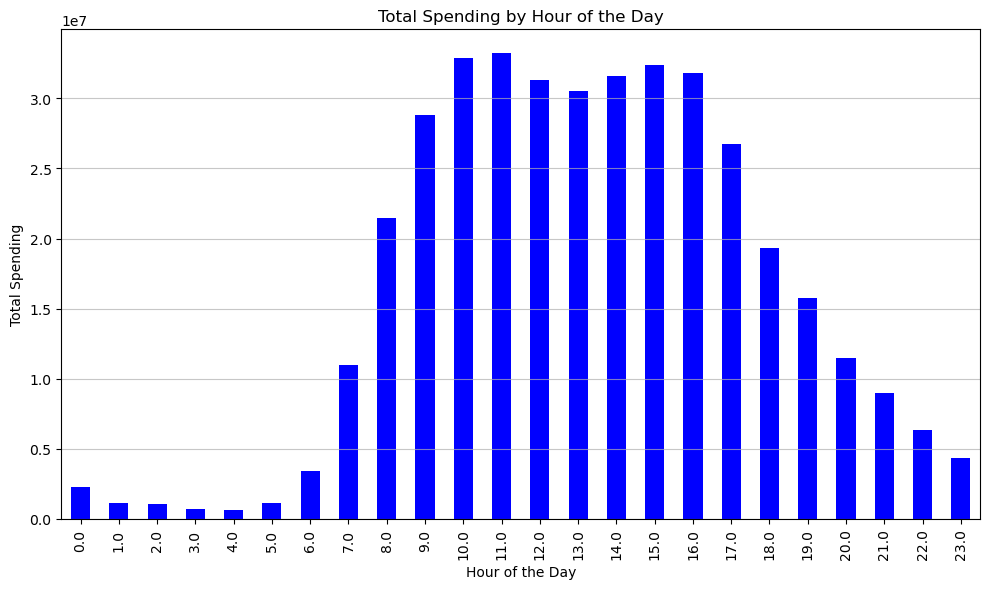

In [54]:
# Grouping by order_hour_of_day and calculating total spending
hourly_spending = merged_data.groupby('order_hour_of_day')['prices'].sum()

# Plotting the data
plt.figure(figsize=(10, 6))
hourly_spending.plot(kind='bar', color='blue')
plt.title('Total Spending by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Spending')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(path, 'total_spending_by_hour.png'))
plt.show()

In [ ]:
merged_data['prices'].plot.hist(bins = 70)

In [ ]:
merged_data.dtypes

In [ ]:
price_range_counts = merged_data['price_range_loc'].value_counts()


plt.bar(price_range_counts.index, price_range_counts.values)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Price Ranges')

plt.savefig(os.path.join(path, 'price_range_distribution'))

plt.show()

In [ ]:
# Group the data by department and count the frequency of product orders for each department
department_order_frequency = merged_data['department'].value_counts().reset_index()
department_order_frequency.columns = ['department', 'order_count']

In [ ]:

plt.bar(department_order_frequency['department'], department_order_frequency['order_count'])
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.title('Frequency of Product Orders by Department')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()  

plt.savefig(os.path.join(path, 'frequency_order_depart'))
plt.show()

In [ ]:
# income and department 
income_department = merged_data[['income', 'department']]

# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(income_department['income'], income_department['department'], alpha=0.7)
plt.title('Income vs Department')
plt.xlabel('Income')
plt.ylabel('Department')
plt.grid(True)
plt.savefig(os.path.join(path, 'income_and_department'))
plt.show()

In [ ]:
# now I want to creat a new dataframe for the visulisation 
distribution_profiles = merged_data[['user_id', 'customer_profile']]

In [ ]:
distribution_profiles.head()

In [ ]:
# now I want to drop the dublicate User ID
distribution_profiles = distribution_profiles.drop_duplicates(subset=['user_id'])

In [ ]:
# now I want to aggregate the data
profile_counts = distribution_profiles['customer_profile'].value_counts()

# Create a pie chart based on the aggregated counts
fig, ax = plt.subplots()
ax.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%')
ax.set_title('Distribution of Customer Profiles')
plt.show()

In [ ]:
fig.savefig(os.path.join(path, 'profile_counts.png'))

## Task 7

In [ ]:
profile_agg = merged_data.groupby('customer_profile').agg({
    'frequency_ave': ['max', 'mean', 'min'],
    'spend_ave': ['max', 'mean', 'min']
})

In [ ]:
profile_agg

In [ ]:
# Selecting only the mean values from the profile_agg DataFrame
profile_mean = profile_agg[[('frequency_ave', 'mean'), ('spend_ave', 'mean')]]

# Plotting the mean values
plot = profile_mean.plot(kind='bar', color='blue')
plot.set_title('Mean Frequency and Spend by Customer Profile')
plot.set_xlabel('Customer Profile')
plot.set_ylabel('Value')
plot.legend(['Mean Frequency Ave', 'Mean Spend Ave'])
plot.figure.tight_layout()

# Save the plot as a file
plot.figure.savefig(os.path.join(path, 'profile_mean.png'))

# Show the plot
plt.show()


## Task 8

In [ ]:
# now I want to creat a new dataframe for the visulisation of task 8
distribution_profiles_t8 = merged_data[['user_id', 'customer_profile', 'department', 'Region' ]]

In [ ]:
# now I want to drop the dublicate User ID
distribution_profiles_t8 = distribution_profiles.drop_duplicates(subset=['user_id'])

In [ ]:
# Apply create_profile function to create profile labels
merged_data['customer_profile'] = merged_data.apply(create_profile, axis=1)

# Create a bar chart
sns.countplot(data=merged_data, x='customer_profile')
plt.title('Customer Profile Distribution (Bar Chart)')
plt.xlabel('Customer Profile')
plt.ylabel('Region')
plt.xticks(rotation=90)
plt.tight_layout()

# Save the plot as a file
plt.savefig(os.path.join(path, 'customer_profile_distribution.png'))

# Show the plot
plt.show()



In [ ]:
sns.savefig(os.path.join(path, 'customer_dist_bar.png'))


In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Age', y='income', hue='customer_profile', palette='viridis')
plt.title('Customer Profile Distribution (Scatter Plot)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Customer Profile')
plt.tight_layout()
plt.show()

In [ ]:
fig.savefig(os.path.join(path, 'customer_dist_plott.png'))

In [55]:
total_rows, total_columns = merged_data.shape
print("Total number of rows:", total_rows)
print("Total number of columns:", total_columns)

Total number of rows: 32404870
Total number of columns: 37


In [56]:
merged_data.to_pickle(os.path.join(path_2,'Order_Products_all.pkl'))